In [1]:
from qiskit import IBMQ

IBMQ.save_account("e540272256e90b70f0254d9f8fe2e4dab50d6552e1ea63cbeaaa9ebaa6bfed778e0917ec68654d9276b93618125bf187817670f2d2c4d649b75f3e199c1c80f6")
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

configrc.store_credentials:WARNING:2021-05-14 13:53:39,522: Credentials already present. Set overwrite=True to overwrite.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [2]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
# more than 10 qubits, real Quantum computer and is operational

provider.backends(filters=lambda x: x.configuration().n_qubits >= 10
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

[<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
from qiskit.providers.ibmq import least_busy

# more than 5 qubits, real Quantum computer and is operational

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                  and not x.configuration().simulator
                                  and x.status().operational==True)
least_busy(small_devices)

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
backend = provider.get_backend('ibmq_lima')
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
backend.provider()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
backend.name()

'ibmq_lima'

In [8]:
backend.status()

In [9]:
backend.configuration()

In [10]:
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - SX gate error of {3}\n"
          "  - SX gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))
    

In [11]:
props = backend.properties()
describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 110.18736984207345 microseconds
  - T2 time of 159.78491221089854 microseconds
  - SX gate error of 0.00016832381484854314
  - SX gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.029703294537436 GHz


In [16]:
ran_job = None
for ran_job in backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

In [18]:
from qiskit import *
from qiskit.compiler import transpile, assemble

In [19]:
# Build
#------

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# END

In [20]:
# Execute
#--------

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# END


Total count for 00 and 11 are: {'00': 489, '11': 511}


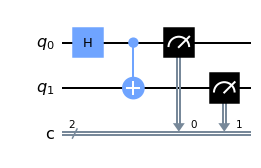

In [21]:
# Visualize
#----------

# Import draw_circuit, then use it to draw the circuit
circuit.draw('mpl')

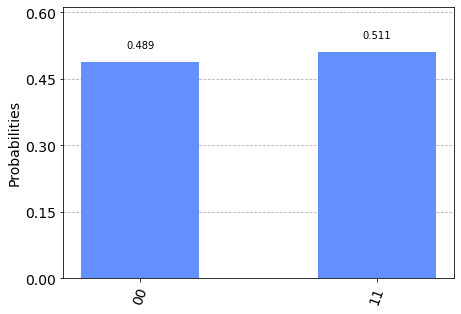

In [23]:
# Analyze
#--------
from qiskit.visualization import plot_histogram
# Plot a histogram
plot_histogram(counts)

# END

In [24]:
job = execute(circuit, backend)

In [29]:
job.job_id()

'609e040baec8e554059f2ba9'

In [36]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [37]:
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 462, '01': 29, '10': 46, '11': 487}


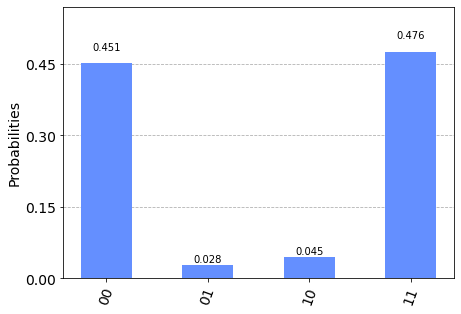

In [38]:
# Analyze
#--------
from qiskit.visualization import plot_histogram
# Plot a histogram
plot_histogram(counts)

# END

In [31]:
from qiskit.providers.ibmq.managed import IBMQJobManager

sim_backend = provider.get_backend('ibmq_qasm_simulator')
circs = transpile([circuit]*20, backend=sim_backend)

# Submit them all to the backend
job_manager = IBMQJobManager()
job_set = job_manager.run(circs, backend=sim_backend, name='foo')

In [32]:
print(job_set.report())

Job set name: foo
          ID: 839ad27104754ceabcfdfef2d993ac5c-16210008016634436
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 1
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-19
    job index: 0
    job ID: 609e04aadf1fcb048eadfc7e
    name: foo_0_
    status: job has successfully run


In [33]:
# Restrict 2 experiments per job.
job_set_multiple = job_manager.run(circs, backend=sim_backend, name='bar', max_experiments_per_job=2)

In [34]:
print(job_set_multiple.report())

Job set name: bar
          ID: 7487e503f2484bf8a71d7f60511f60dc-16210008477223077
        tags: []
Summary report:
       Total jobs: 10
  Successful jobs: 10
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-1
    job index: 0
    job ID: 609e04d853f4284d84ca264d
    name: bar_0_
    status: job has successfully run
  experiments: 2-3
    job index: 1
    job ID: 609e04d9663519ad439df4e0
    name: bar_1_
    status: job has successfully run
  experiments: 4-5
    job index: 2
    job ID: 609e04db7720780adb90de71
    name: bar_2_
    status: job has successfully run
  experiments: 6-7
    job index: 3
    job ID: 609e04dc7040484eb2639ba2
    name: bar_3_
    status: job has successfully run
  experiments: 8-9
    job index: 4
    job ID: 609e04deb3badf7ee1553e60
    name: bar_4_
    status: job has successfully run
  experiments: 10-11
    job index: 5
    job ID: 609e04e053f428cf64ca264e
    name: bar_5_
    status: j